In [2]:
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pa

In [3]:
df = pd.read_excel('CornData.xlsx')

In [16]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-02-24,500.30,504.60,505.13,500.10,34.82K,-0.0093
1,2025-02-21,505.00,512.25,513.75,504.25,235.05K,-0.0151
2,2025-02-20,512.75,512.00,518.00,511.75,167.19K,0.0010
3,2025-02-19,512.25,515.25,518.75,511.00,185.42K,-0.0068
4,2025-02-18,515.75,508.00,517.75,505.50,173.58K,0.0393


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

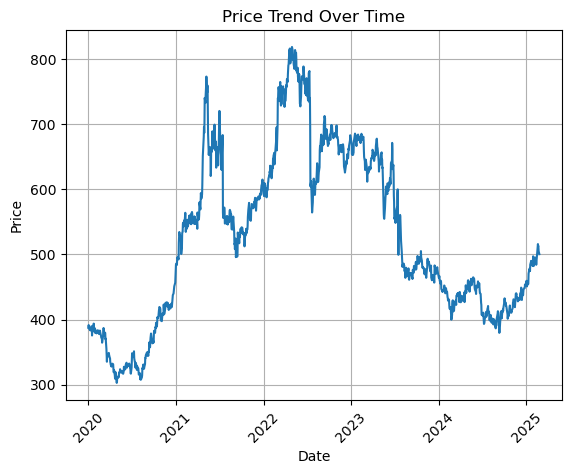

In [13]:
plt.Figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], linestyle='-')

# Formatting
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trend Over Time')
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

plt.show()

In [15]:
df.describe()

,Date,Price,Open,High,Low,Change %
count,1311,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,2022-07-25 06:57:23.478260736,524.912647,524.575988,530.868810,518.923562,0.000362
min,2020-01-01 00:00:00,302.750000,302.750000,308.500000,300.250000,-0.173900
25%,2021-04-12 12:00:00,420.500000,420.375000,425.125000,417.375000,-0.008750
50%,2022-07-22 00:00:00,497.000000,497.250000,504.000000,492.500000,0.000500
75%,2023-11-06 12:00:00,637.125000,636.500000,644.625000,628.875000,0.009900
max,2025-02-24 00:00:00,818.250000,817.500000,827.000000,814.000000,0.079600
std,NaN,129.527861,129.469635,131.846051,127.264950,0.018130


In [ ]:
# Missing weekend data isn't great... Lets deal with it later.
# ARIMA does require equidistant data to be most effective.

In [ ]:
# Test for stationarity

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Price'])

print('ADF Statistic: %f'% adf_test[0])
print('p-value: %f'% adf_test[1])


ADF Statistic: -1.290728
p-value: 0.633404


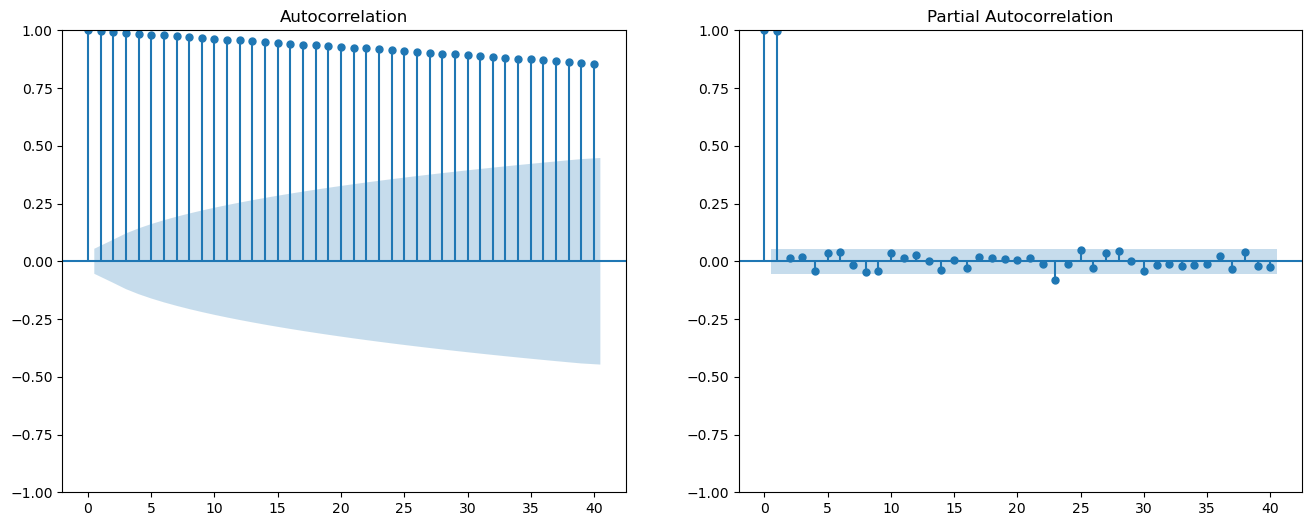

In [28]:
#Seasonality

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(df['Price'], lags=40, alpha=0.05, ax=axes[0])
plot_pacf(df['Price'], lags=40, alpha=0.05, ax=axes[1], method='ywm')

plt.tight_layout
plt.show()


(1048,)
(263,)


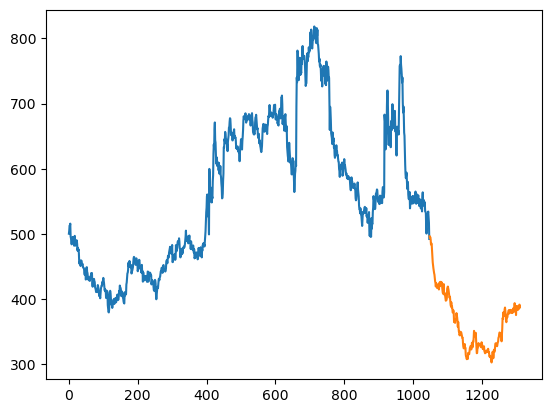

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df['Price'], test_size=0.2, shuffle=False)

print(train.shape)
print(test.shape)

plt.plot(train)
plt.plot(test)

In [33]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(train, d=None, start_p = 0, start_q=0, max_p=5, max_d=5,max_q=5, seasonal=False, stationary=False, error_action='warn', trace=True, suppress_warnings=True, stepwise=True, random_state=69, n_fits=50)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8118.584, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8120.318, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8120.303, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8116.584, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8122.256, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.900 seconds


Random Walk, happy days

Lets apply it to our test for shits

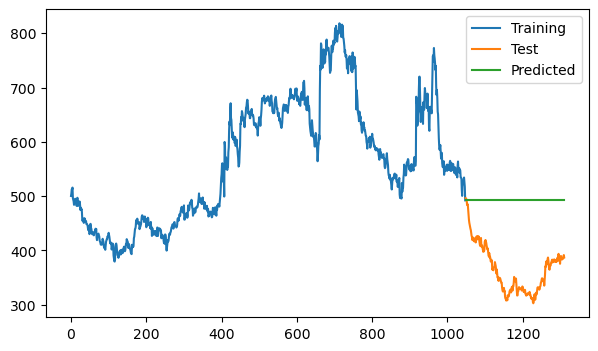

In [34]:
prediction = pd.DataFrame(arima_model.predict(n_periods=263))
prediction.columns = ['predicted_value']


plt.figure(figsize=(7,4))
plt.plot(train, label="Training")
plt.plot(test, label="Test")
plt.plot(prediction, label="Predicted")
plt.legend(loc='upper right')
plt.show()

To do
- check residuals
- Compare with/try SARIMA and/or ARIMAX
- Clean weekend data

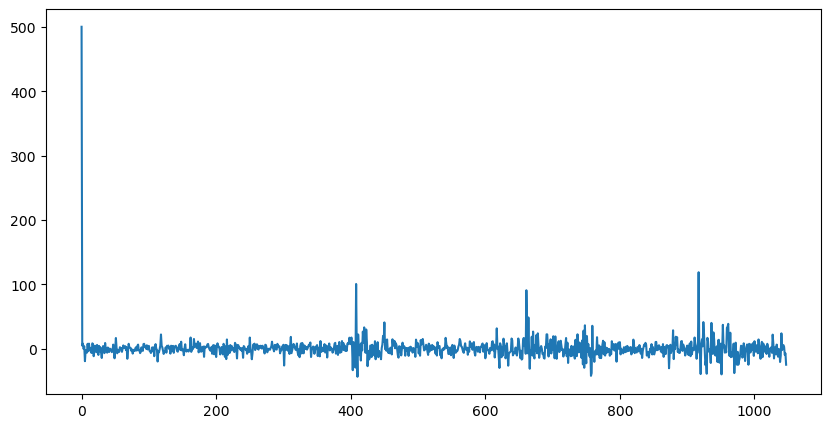

In [36]:
residuals = arima_model.resid()
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.show()

In [ ]:
outlier_indices = residuals[residuals > 70].index
print(outlier_indices)

Index([0, 408, 661, 917], dtype='int64')


mor